In [3]:
import pandas as pd

df_airlines = pd.read_csv('/content/nyc_airlines.csv')
df_airports = pd.read_csv('/content/nyc_airports.csv')
df_airflight_fixed = pd.read_csv('/content/nyc_flights_fixed.csv')
df_planes = pd.read_csv('/content/nyc_planes.csv')
df_weather = pd.read_csv('/content/nyc_weather.csv')

In [49]:
df_airlines['carrier'].unique()

array(['9E', 'AA', 'AS', 'B6', 'DL', 'EV', 'F9', 'FL', 'HA', 'MQ', 'OO',
       'UA', 'US', 'VX', 'WN', 'YV'], dtype=object)

In [51]:
df_airlines.head()

,carrier,name
0,9E,Endeavor Air Inc.
1,AA,American Airlines Inc.
2,AS,Alaska Airlines Inc.
3,B6,JetBlue Airways
4,DL,Delta Air Lines Inc.


In [6]:
df_airflight_fixed.head()

,Unnamed: 0,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,0,2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01T10:00:00Z
1,1,2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01T10:00:00Z
2,2,2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01T10:00:00Z
3,3,2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01T11:00:00Z
4,4,2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01T10:00:00Z


In [14]:
df_filter = df_airflight_fixed[df_airflight_fixed['origin']=='EWR']

In [23]:
len(df_filter['dest'].unique())

82

In [22]:
df_filter['dest'].unique()

array(['IAH', 'ORD', 'FLL', 'SFO', 'LAS', 'PBI', 'MIA', 'ATL', 'PHX',
       'MSP', 'LAX', 'IAD', 'CLT', 'SNA', 'TPA', 'RSW', 'SEA', 'DEN',
       'MCO', 'BOS', 'JAX', 'CHS', 'MEM', 'DFW', 'MYR', 'JAC', 'RDU',
       'DTW', 'SAN', 'MDW', 'CLE', 'EGE', 'DCA', 'AVL', 'STL', 'BUF',
       'IND', 'MKE', 'PWM', 'SAV', 'SYR', 'CMH', 'ROC', 'BWI', 'BTV',
       'DAY', 'HOU', 'ALB', 'BDL', 'SLC', 'PIT', 'HNL', 'MHT', 'MSN',
       'GSO', 'CVG', 'AUS', 'RIC', 'GSP', 'GRR', 'MCI', 'BNA', 'SAT',
       'SDF', 'PDX', 'OMA', 'TUL', 'TYS', 'OKC', 'PVD', 'DSM', 'ORF',
       'XNA', 'MSY', 'CAE', 'PHL', 'HDN', 'BZN', 'MTJ', 'SBN', 'TVC',
       'ANC'], dtype=object)

#Rank Total Flights

In [52]:
df_join = pd.merge(df_filter,df_airlines,on='carrier', how='left')
df_join.head()

,Unnamed: 0,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,...,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,name
0,0,2013,1,1,517,515,2,830,819,11,...,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01T10:00:00Z,United Air Lines Inc.
1,4,2013,1,1,554,558,-4,740,728,12,...,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01T10:00:00Z,United Air Lines Inc.
2,5,2013,1,1,555,600,-5,913,854,19,...,507,N516JB,EWR,FLL,158,1065,6,0,2013-01-01T11:00:00Z,JetBlue Airways
3,11,2013,1,1,558,600,-2,923,937,-14,...,1124,N53441,EWR,SFO,361,2565,6,0,2013-01-01T11:00:00Z,United Air Lines Inc.
4,13,2013,1,1,559,600,-1,854,902,-8,...,1187,N76515,EWR,LAS,337,2227,6,0,2013-01-01T11:00:00Z,United Air Lines Inc.


In [58]:
df_airlines_rank = df_join.groupby(['carrier', 'name']).agg(total_flight=('flight', 'count')).reset_index()
df_airlines_rank.sort_values(by='total_flight', ascending=False).reset_index().drop('index', axis=1)

,carrier,name,total_flight
0,UA,United Air Lines Inc.,43983
1,EV,ExpressJet Airlines Inc.,43939
2,WN,Southwest Airlines Co.,6165
3,B6,JetBlue Airways,6086
4,US,US Airways Inc.,4297
5,DL,Delta Air Lines Inc.,4237
6,VX,Virgin America,1566
7,9E,Endeavor Air Inc.,1200
8,AA,American Airlines Inc.,1145
9,AS,Alaska Airlines Inc.,714


#Total Delay

In [46]:
df_delays = df_filter.groupby(['month']).agg(total_delay=('dep_delay', 'sum')).reset_index()
df_delays['cumulative_delays'] = df_delays['total_delay'].cumsum()

In [47]:
df_delays

,month,total_delay,cumulative_delays
0,1,137745,137745
1,2,108103,245848
2,3,174307,420155
3,4,167060,587215
4,5,150919,738134
5,6,209184,947318
6,7,214017,1161335
7,8,130502,1291837
8,9,64724,1356561
9,10,84273,1440834


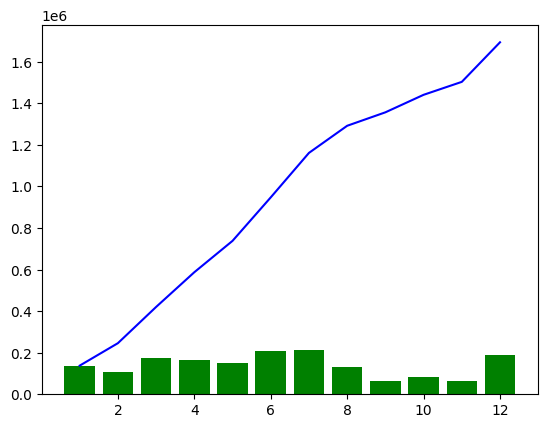

In [48]:
import matplotlib.pyplot as plt

plt.bar(df_delays['month'], df_delays['total_delay'], color='g')
plt.plot(df_delays['month'], df_delays['cumulative_delays'], color='b')
plt.show()

# No of Unique flights to EWR

In [24]:
df_airflight_fixed['year'].unique()

array([2013])

In [26]:
df_agg = df_airflight_fixed.groupby(['month'])['dest'].nunique()

In [27]:
df_agg

month
1     90
2     88
3     91
4     89
5     85
6     88
7     89
8     89
9     88
10    87
11    86
12    92
Name: dest, dtype: int64

In [28]:
df_agg = df_filter.groupby(['month'])['dest'].nunique()
df_agg

month
1     79
2     78
3     78
4     74
5     72
6     73
7     74
8     74
9     72
10    70
11    72
12    78
Name: dest, dtype: int64

#Monthly Flights

In [32]:
df_month_count = df_filter.groupby(['month']).agg(count_dest=('dest', 'count'))
df_month_count

,count_dest
month,
1,9246
2,8400
3,9669
4,9818
5,9931
6,9490
7,9765
8,9727
9,8994


In [34]:
df_month_count = df_month_count.reset_index().rename(columns={'count_dest': 'count'})
df_month_count

,index,month,count
0,0,1,9246
1,1,2,8400
2,2,3,9669
3,3,4,9818
4,4,5,9931
5,5,6,9490
6,6,7,9765
7,7,8,9727
8,8,9,8994
9,9,10,9657


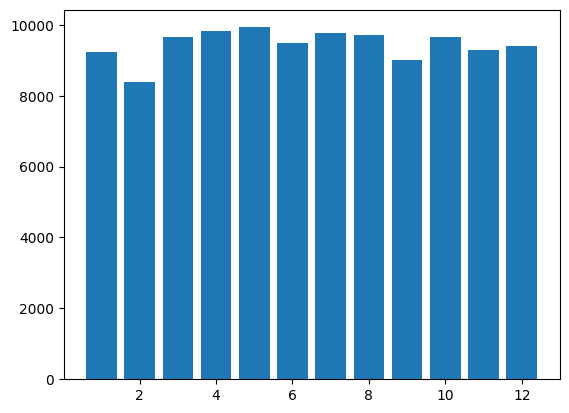

In [36]:
import matplotlib.pyplot as plt

plt.bar(df_month_count['month'], df_month_count['count'])
plt.show()